<a href="https://colab.research.google.com/github/GuariJuan/FIA-TP6/blob/main/FIA2023_TP06_GUARI_JUAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
install.packages('neuralnet')
install.packages('NeuralNetTools')
install.packages('ggplot2')
install.packages('gridExtra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library('neuralnet')
library('NeuralNetTools')
library('ggplot2')
library('gridExtra')

1. Crear un dataset artificial balanceado a partir de datos generados aleatoriamente con distribución normal de dimensiones [100,3]. Generar los primeros 50 patrones (perteneciente a la clase 1) con una distribución normal con media=5 y SD=2. Generar los 50 patrones restantes (perteneciente a la clase 0) con una distribución normal con media=11 y SD=2.

In [8]:
set.seed(134678)
#Generamos el primer vector con 50 filas correspondientes a cada clase
X1 = c(rnorm(50,5,2),rnorm(50,11,2))
#Generamos el segundo vector con 50 filas correspondientes a cada clase.
X2 = c(rnorm(50,5,2),rnorm(50,11,2))
#Generamos el vector de etiquetas
clase = c(rep(1,50), rep(0,50))

2. Aplicar al dataset el método Hold-Out con un 70% para entrenar y el resto para prueba.

In [11]:
set.seed(134678)
#Creamos indices de muestra para seleccionar 15 elementos aleatorios de cada clase
indice.test1 = sample(1:50,15)
indice.test0 = sample(51:100,15)
#Usamos los indices creados para separar los datos de entrenamiento (x1tr y x2tr)
# y los de prueba (x1test y x2test)
X1tr = X1[-c(indice.test1,indice.test0)]
X2tr = X2[-c(indice.test1,indice.test0)]
X1test = X1[c(indice.test1,indice.test0)]
X2test = X2[c(indice.test1,indice.test0)]

#Hacemos lo mismo con el vector de etiquetas
clase_tr = clase[-c(indice.test1,indice.test0)]
clase_test = clase[c(indice.test1,indice.test0)]

#Finalmente armamos los df de entrenamiento y prueba
dataset_train_RNA = data.frame(X1tr,X2tr,clase_tr)
dataset_test = data.frame(X1test,X2test,clase_test)

3. Graficar el dataset de test. Los patrones de la clase 1 con color rojo y los patrones de la clase 0 con azul. Colocar a la gráfica el título “Dataset Test”. Etiquetar los ejes de la gráfica con “X1” y “X2”. Guardar la gráfica en formato PDF con el nombre “Grafica_dataset_test.pdf”.

In [16]:
pdf("Grafica_dataset_test.pdf")
ggplot(data = dataset_test,aes(x=X1test, y=X2test, color=as.factor(clase_test)))+
  geom_point()+labs(title="Dataset Test", x="X1", y="x2")+
  scale_color_manual(values = c("blue","red"),name="Clase")
dev.off()

png 
  2

4. Entrenar 10 veces una red neuronal con el algoritmo Back Propagation, la red debe tener 10 neuronas en la capa oculta, además se debe usar la derivada de la función de error como criterio de parada (la suma de errores cuadráticos) con un umbral igual a 0.01, función de activación logística (logistic) tanto para la capa oculta como para la capa de salida y learning rate =0.001. (En caso de no converger ajuste los parámetros necesarios para asegurar la convergencia).

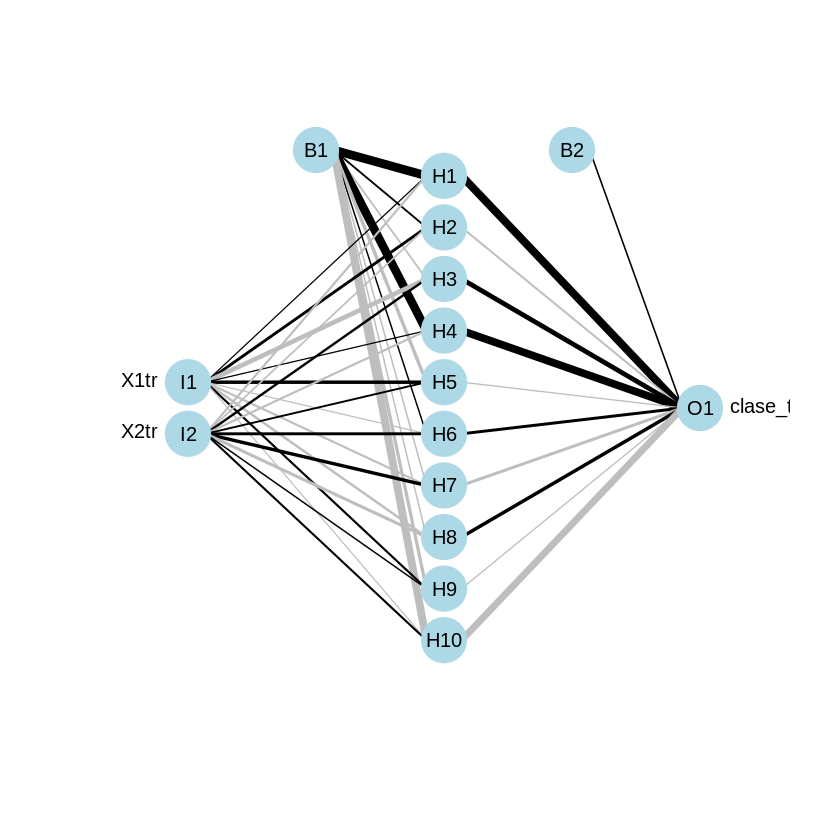

In [20]:
red = neuralnet(
  #formula
  clase_tr~X1tr+X2tr,
  #data
  dataset_train_RNA,
  #capas ocultas
  hidden=10,
  #si act.fct NO debe aplicarse a la salida TRUE, de lo contrario FALSE
  linear.output = FALSE,
  #funcion de activacion
  act.fct = "logistic",
  #tipo de algoritmo
  algorithm="backprop",
  #umbral
  threshold=0.01,
  #tasa de aprendisaje se probo con 0.001, 0.005 pero no convergio
  learningrate=0.009,
  #cantidad de repeticiones
  rep=10
)
#Graficamos la mejor configuracion
plotnet(red,rep = "best")

5. Realizar las predicciones sobre el conjunto de prueba. Calcular el error de Clasificación de la red.

In [22]:
#Usamos 'compute' para realizar las predicciones con el df de prueba
pred = compute(red,dataset_test[,-3])

pred$net.result

#Guardamoslas predicciones
predicciones_RNA = round(pred$net.result)

#Calculamos el error
ErrorC_RNA = sum(predicciones_RNA!=dataset_test[,3])/length(dataset_test[,3])
print(ErrorC_RNA)

0.9999997552
0.9999998401
0.7000698314
0.9999986585
0.9997854255
0.9999972146
0.9999988512
0.9999989549
0.9999951915
0.7805247970
0.9999979221


[1] 0.1666667


6. Graficar las predicciones obtenidas. Los patrones de la clase 1 con color rojo y los patrones de la clase 0 con azul. Colocar a la gráfica el título “Predicciones RNA”. Etiquetar los ejes de la

In [24]:
#unimos nuestras predicciones con las columnas 1 y 2 del dataset
predicciones = cbind(dataset_test[,1:2],predicciones_RNA)

pdf("Grafica_dataset_test.pdf")
ggplot(data = as.data.frame(predicciones), aes(x = X1test, y = X2test, color = as.factor(predicciones_RNA)))+
  geom_point()+
  labs(title="Dataset Test",x="X1", y="X2")+
  scale_color_manual(values = c("blue","red"),name="Clase")
dev.off()

png 
  2

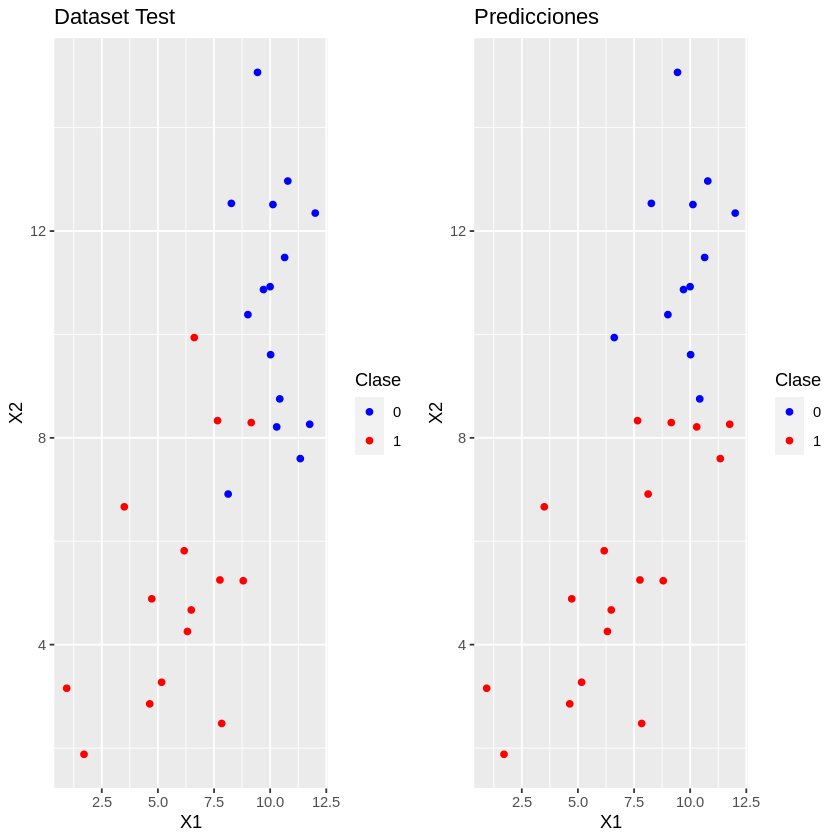

In [25]:
#PARA COMPARAR LOS GRAFICOS
#Grafico para el conjunto de datos de prueba
plot_dataset_test = ggplot(data = dataset_test, aes(x=X1test, y=X2test, color=as.factor(clase_test)))+
  geom_point()+
  labs(title="Dataset Test",x="X1", y="X2")+
  scale_color_manual(values = c("blue","red"), name="Clase")
#Grafico para las predicciones
plot_predictions = ggplot(data = as.data.frame(predicciones), aes(x=X1test, y=X2test, color=as.factor(predicciones_RNA)))+
  geom_point()+
  labs(title="Predicciones",x="X1",y="X2")+
  scale_color_manual(values = c("blue","red"),name="Clase")

grid.arrange(plot_dataset_test,plot_predictions, ncol=2)

7. Escriba sus conclusiones:
Con respecto al grafico de la red construida con back-propagation se observa en color negro cuales son las conexiones más importantes para la convergencia, es decir, que funcionaron mejor, mientras que las que están en gris son las que menos aportaron.
Entonces podemos decir que nueve neuronas tuvieron mejores conexiones, es decir que podríamos configurar la red con solo nueve neuronas en la capa oculta y sería muy posible que obtengamos mejores resultados.
Por último en cuanto a las predicciones y observando ambos gráficos, el grafico para el conjunto de datos de prueba y el grafico para las predicciones podemos decir que las predicciones han sido bastante acertadas, salvo 5 puntos.
